In [ ]:
!pip install plotnine         

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from statistics import mode
import plotly
import plotly.graph_objs as go
import seaborn as sns
from plotnine import *

**Social Bias Annotators' Demographics**

For disagreement judgement, how the demographic backgrounds are differently composed?


> For all offensive disagreement, there 10441 age difference, 4167 race diffrence, 4896 gender difference, 8218 politics difference.



In [ ]:
SBIC_Train = pd.read_csv('/content/drive/MyDrive/Morality   Legality/Original_Datasets/SBIC/SBIC.v2.trn.csv')
SBIC_Dev = pd.read_csv('/content/drive/MyDrive/Morality   Legality/Original_Datasets/SBIC/SBIC.v2.dev.csv')
SBIC_Test = pd.read_csv('/content/drive/MyDrive/Morality   Legality/Original_Datasets/SBIC/SBIC.v2.tst.csv')

In [ ]:
frames = [SBIC_Train, SBIC_Dev, SBIC_Test]
SBIC_Total = pd.concat(frames)
SBIC_Demographics = SBIC_Total[['WorkerId','annotatorGender','annotatorMinority','annotatorPolitics','annotatorRace','annotatorAge']].groupby(['WorkerId'])
print(f'There are in total {sum(SBIC_Demographics.WorkerId.nunique())} annotators in the SBIC study')

There are in total 307 annotators in the SBIC study


1. How many unique annotators in train/dev/test? <br>
* 263 unique annotators in training set, 199 annotators in development set, 204 annotators in testing set. <br>
Each unique workerId matchs a individual person.
* There are 83 annotators recorded different demographics. The differences are majorly in age(±1, ±3, ±4), politics(i.e. liberal or mod-liberal). This may be cause by human/machine error or that the annotators changed age/polictics over time. 
* 3 people have duplicated demographic records because recording 'na' or 'other' for gender and race. These can be filled with recorded meaningful gender/race.
* id = -6837958490067487319, selected 33 times of 'man', 693 times of 'woman'. <br>
And id =	-7297283282402353981, selected 4 times of 'nonbinary' and 1193 times of 'man'. 
* We can choose the mode to represent individual demographics for above cases. 

2. Is there overlapped annotator across train/dev/test?<br>
yes <br>
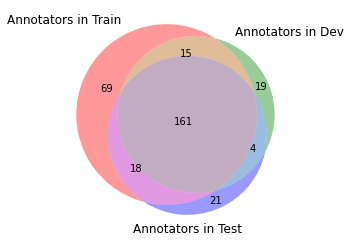

In [ ]:
print(SBIC_Demographics['annotatorAge'].describe())
for i in ['annotatorGender','annotatorRace','annotatorPolitics']:
  print(SBIC_Demographics[i].value_counts())

count    307.000000
mean      37.618893
std       13.368387
min       18.000000
25%       29.000000
50%       35.000000
75%       42.000000
max      100.000000
Name: annotatorAge, dtype: float64
woman        169
man          128
na             6
transman       2
nonBinary      2
Name: annotatorGender, dtype: int64
white     251
asian      13
hisp       12
black      12
other      10
na          7
native      2
Name: annotatorRace, dtype: int64
liberal        137
mod-liberal     57
mod-cons        36
other           29
cons            26
na              13
libert           9
Name: annotatorPolitics, dtype: int64


number of unique annotators in training set:  263
number of unique annotators in development set:  199
number of unique annotators in testing set:  204
number of unique annotators in the entire dataset:  307 
number of duplicated annotators demographics in the entire dataset:  83 
number of duplicated annotators demographic by filtering id, gender, race in the entire dataset: 5
                WorkerId annotatorGender annotatorRace  size
33  -7297283282402353981             man          hisp  1193
34  -7297283282402353981       nonBinary          hisp     4
41  -6837958490067487319             man         white    33
42  -6837958490067487319           woman         white   693
168  1147960939871721323             man         asian  1130
169  1147960939871721323             man         other     9
176  1549664617862804761              na            na    58
177  1549664617862804761           woman            na    13
178  1549664617862804761           woman         white    92
179  1558

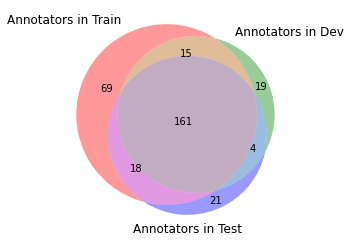

In [ ]:
SBIC_Train_Demographics = SBIC_Train[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']]
SBIC_Train_Demographics = SBIC_Train_Demographics.groupby(SBIC_Train_Demographics.columns.tolist(),as_index=False).size()
duplicated_train_workerId = SBIC_Train_Demographics['WorkerId'].duplicated(keep=False)
SBIC_Train_Demographics_duplicated = SBIC_Train_Demographics[duplicated_train_workerId]
SBIC_Train_Demographics_cleaned = SBIC_Train[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']].groupby(['WorkerId', 'annotatorGender','annotatorRace'],as_index=False).size()
duplicated_cleaned_train_workerId = SBIC_Train_Demographics_cleaned['WorkerId'].duplicated(keep=False)
print('number of unique annotators in training set: ', SBIC_Train_Demographics['WorkerId'].nunique())

SBIC_Dev_Demographics = SBIC_Dev[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']]
SBIC_Dev_Demographics = SBIC_Dev_Demographics.groupby(SBIC_Dev_Demographics.columns.tolist(),as_index=False).size()
duplicated_Dev_workerId = SBIC_Dev_Demographics['WorkerId'].duplicated(keep=False)
SBIC_Dev_Demographics_duplicated = SBIC_Dev_Demographics[duplicated_Dev_workerId]
SBIC_Dev_Demographics_cleaned = SBIC_Dev[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']].groupby(['WorkerId', 'annotatorGender','annotatorRace'],as_index=False).size()
duplicated_cleaned_Dev_workerId = SBIC_Dev_Demographics_cleaned['WorkerId'].duplicated(keep=False)
print('number of unique annotators in development set: ', SBIC_Dev_Demographics['WorkerId'].nunique())

SBIC_Test_Demographics = SBIC_Test[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']]
SBIC_Test_Demographics = SBIC_Test_Demographics.groupby(SBIC_Test_Demographics.columns.tolist(),as_index=False).size()
duplicated_Test_workerId = SBIC_Test_Demographics['WorkerId'].duplicated(keep=False)
SBIC_Test_Demographics_duplicated = SBIC_Test_Demographics[duplicated_Test_workerId]
SBIC_Test_Demographics_cleaned = SBIC_Test[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']].groupby(['WorkerId', 'annotatorGender','annotatorRace'],as_index=False).size()
duplicated_cleaned_Test_workerId = SBIC_Test_Demographics_cleaned['WorkerId'].duplicated(keep=False)
print('number of unique annotators in testing set: ', SBIC_Test_Demographics['WorkerId'].nunique())

SBIC_Total_Demographics = SBIC_Total[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']]
SBIC_Total_Demographics = SBIC_Total_Demographics.groupby(SBIC_Total_Demographics.columns.tolist(),as_index=False).size()
duplicated_Total_workerId = SBIC_Total_Demographics['WorkerId'].duplicated(keep=False)
SBIC_Total_Demographics_duplicated = SBIC_Total_Demographics[duplicated_Total_workerId]
SBIC_Total_Demographics_cleaned = SBIC_Total[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']].groupby(['WorkerId', 'annotatorGender','annotatorRace'],as_index=False).size()
duplicated_cleaned_Total_workerId = SBIC_Total_Demographics_cleaned['WorkerId'].duplicated(keep=False)

print('number of unique annotators in the entire dataset: ', SBIC_Total_Demographics['WorkerId'].nunique(),
      '\nnumber of duplicated annotators demographics in the entire dataset: ',  SBIC_Total_Demographics_duplicated['WorkerId'].nunique(),
    '\nnumber of duplicated annotators demographic by filtering id, gender, race in the entire dataset:',SBIC_Total_Demographics_cleaned[duplicated_cleaned_Total_workerId]['WorkerId'].nunique())
print(SBIC_Total_Demographics_cleaned[duplicated_cleaned_Total_workerId])

Train_unique_annotators = SBIC_Train_Demographics['WorkerId'].unique()
Dev_unique_annotators = SBIC_Dev_Demographics['WorkerId'].unique()
Test_unique_annotators = SBIC_Test_Demographics['WorkerId'].unique()
#print(len(np.intersect1d(Train_unique_annotators,Dev_unique_annotators)),len(np.intersect1d(Train_unique_annotators,Test_unique_annotators)),len(np.intersect1d(Test_unique_annotators,Dev_unique_annotators)),len(np.intersect1d(np.intersect1d(Train_unique_annotators,Dev_unique_annotators),np.intersect1d(Train_unique_annotators,Test_unique_annotators))))

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
set1 = set(Train_unique_annotators.flatten())
set2 = set(Dev_unique_annotators.flatten())
set3 = set(Test_unique_annotators.flatten())
venn3([set1,set2,set3], ('Annotators in Train', 'Annotators in Dev', 'Annotators in Test'))
plt.show()

Convert inconsistent to demographic to each person's most common gender, politics, race and age:

In [ ]:
SBIC_Total_Demographics = SBIC_Total[['WorkerId','annotatorGender','annotatorPolitics','annotatorRace','annotatorAge']]
SBIC_Demographics = SBIC_Total_Demographics.groupby('WorkerId')['annotatorGender','annotatorPolitics','annotatorRace','annotatorAge'].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Demographics.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(307, 5)

In [ ]:
SBIC_Demographics[SBIC_Demographics['WorkerId'] == -6837958490067487319]

,WorkerId,annotatorGender,annotatorPolitics,annotatorRace,annotatorAge
40,-6837958490067487319,woman,liberal,white,34.0


In [ ]:
SBIC_Demographics.to_csv('/content/drive/MyDrive/Morality   Legality/Original_Datasets/SBIC/SBIC_Demographics.csv',index=False)

In [ ]:
SBIC_Total_dropped = SBIC_Total.drop(columns=['annotatorGender','annotatorPolitics','annotatorRace','annotatorAge'])
SBIC_Total_updated = pd.merge(SBIC_Total_dropped, SBIC_Demographics, on="WorkerId", how="left")
SBIC_Train_dropped = SBIC_Train.drop(columns=['annotatorGender','annotatorPolitics','annotatorRace','annotatorAge'])
SBIC_Train_updated = pd.merge(SBIC_Train_dropped, SBIC_Demographics, on="WorkerId", how="left")
SBIC_Dev_dropped = SBIC_Dev.drop(columns=['annotatorGender','annotatorPolitics','annotatorRace','annotatorAge'])
SBIC_Dev_updated = pd.merge(SBIC_Dev_dropped, SBIC_Demographics, on="WorkerId", how="left")
SBIC_Test_dropped = SBIC_Test.drop(columns=['annotatorGender','annotatorPolitics','annotatorRace','annotatorAge'])
SBIC_Test_updated = pd.merge(SBIC_Test_dropped, SBIC_Demographics, on="WorkerId", how="left")

In [ ]:
SBIC_Total_updated['offensive_disagreement'] = SBIC_Total_updated.groupby("HITId")["offensiveYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)
SBIC_Total_updated['intent_disagreement'] = SBIC_Total_updated.groupby("HITId")["intentYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)                    
SBIC_Total_updated['sex_disagreement'] = SBIC_Total_updated.groupby("HITId")["sexYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)    
offensive_modes = SBIC_Total_updated.groupby("HITId")["offensiveYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Total_updated['Major_offensive'] = SBIC_Total_updated['HITId'].map(offensive_modes.set_index('HITId')['offensiveYN'])

sex_modes = SBIC_Total_updated.groupby("HITId")["sexYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Total_updated['Major_sex'] = SBIC_Total_updated['HITId'].map(sex_modes.set_index('HITId')['sexYN'])

intent_modes = SBIC_Total_updated.groupby("HITId")["intentYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Total_updated['Major_intent'] = SBIC_Total_updated['HITId'].map(intent_modes.set_index('HITId')['intentYN'])


SBIC_Total_updated['person_offensive_disagreement'] = [1 if SBIC_Total_updated['offensiveYN'].iloc[x] != SBIC_Total_updated['Major_offensive'].iloc[x] else 0 for x in range(len(SBIC_Total_updated['offensiveYN']))]
SBIC_Total_updated['person_sex_disagreement'] = [1 if SBIC_Total_updated['sexYN'].iloc[x] != SBIC_Total_updated['Major_sex'].iloc[x] else 0 for x in range(len(SBIC_Total_updated['sexYN']))]
SBIC_Total_updated['person_intent_disagreement'] = [1 if SBIC_Total_updated['intentYN'].iloc[x] != SBIC_Total_updated['Major_intent'].iloc[x] else 0 for x in range(len(SBIC_Total_updated['intentYN']))]

IndexError: ignored

In [ ]:
SBIC_Train_updated['offensive_disagreement'] = SBIC_Train_updated.groupby("HITId")["offensiveYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)
SBIC_Train_updated['intent_disagreement'] = SBIC_Train_updated.groupby("HITId")["intentYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)                    
SBIC_Train_updated['sex_disagreement'] = SBIC_Train_updated.groupby("HITId")["sexYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)    
offensive_modes = SBIC_Train_updated.groupby("HITId")["offensiveYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Train_updated['Major_offensive'] = SBIC_Train_updated['HITId'].map(offensive_modes.set_index('HITId')['offensiveYN'])

sex_modes = SBIC_Train_updated.groupby("HITId")["sexYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Train_updated['Major_sex'] = SBIC_Train_updated['HITId'].map(sex_modes.set_index('HITId')['sexYN'])

intent_modes = SBIC_Train_updated.groupby("HITId")["intentYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Train_updated['Major_intent'] = SBIC_Train_updated['HITId'].map(intent_modes.set_index('HITId')['intentYN'])


SBIC_Train_updated['person_offensive_disagreement'] = [1 if SBIC_Train_updated['offensiveYN'].iloc[x] != SBIC_Train_updated['Major_offensive'].iloc[x] else 0 for x in range(len(SBIC_Train_updated['offensiveYN']))]
SBIC_Train_updated['person_sex_disagreement'] = [1 if SBIC_Train_updated['sexYN'].iloc[x] != SBIC_Train_updated['Major_sex'].iloc[x] else 0 for x in range(len(SBIC_Train_updated['sexYN']))]
SBIC_Train_updated['person_intent_disagreement'] = [1 if SBIC_Train_updated['intentYN'].iloc[x] != SBIC_Train_updated['Major_intent'].iloc[x] else 0 for x in range(len(SBIC_Train_updated['intentYN']))]

In [ ]:
SBIC_Test_updated['offensive_disagreement'] = SBIC_Test_updated.groupby("HITId")["offensiveYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)
SBIC_Test_updated['intent_disagreement'] = SBIC_Test_updated.groupby("HITId")["intentYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)                    
SBIC_Test_updated['sex_disagreement'] = SBIC_Test_updated.groupby("HITId")["sexYN"] \
                    .transform(lambda x: 1 if (x.nunique() >1 ) else 0)    
offensive_modes = SBIC_Test_updated.groupby("HITId")["offensiveYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Test_updated['Major_offensive'] = SBIC_Test_updated['HITId'].map(offensive_modes.set_index('HITId')['offensiveYN'])

sex_modes = SBIC_Test_updated.groupby("HITId")["sexYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Test_updated['Major_sex'] = SBIC_Test_updated['HITId'].map(sex_modes.set_index('HITId')['sexYN'])

intent_modes = SBIC_Test_updated.groupby("HITId")["intentYN"].apply(lambda x: x.mode().iloc[0]).reset_index()
SBIC_Test_updated['Major_intent'] = SBIC_Test_updated['HITId'].map(intent_modes.set_index('HITId')['intentYN'])


SBIC_Test_updated['person_offensive_disagreement'] = [1 if SBIC_Test_updated['offensiveYN'].iloc[x] != SBIC_Test_updated['Major_offensive'].iloc[x] else 0 for x in range(len(SBIC_Test_updated['offensiveYN']))]
SBIC_Test_updated['person_sex_disagreement'] = [1 if SBIC_Test_updated['sexYN'].iloc[x] != SBIC_Test_updated['Major_sex'].iloc[x] else 0 for x in range(len(SBIC_Test_updated['sexYN']))]
SBIC_Test_updated['person_intent_disagreement'] = [1 if SBIC_Test_updated['intentYN'].iloc[x] != SBIC_Test_updated['Major_intent'].iloc[x] else 0 for x in range(len(SBIC_Test_updated['intentYN']))]

In [ ]:
SBIC_Total_updated.to_csv('/content/drive/MyDrive/Morality   Legality/Processed_Datasets/Processed_SBIC/SBIC_Total_updated.csv',index=False)

In [ ]:
SBIC_Total_updated['offensive_disagreement']

0         1
1         1
2         1
3         0
4         0
         ..
147134    0
147135    0
147136    1
147137    1
147138    1
Name: offensive_disagreement, Length: 147139, dtype: int64

In [ ]:
SBIC_Train_updated.to_csv('/content/drive/MyDrive/Morality   Legality/Processed_Datasets/Processed_SBIC/SBIC_Train_updated.csv',index=False)
SBIC_Dev_updated.to_csv('/content/drive/MyDrive/Morality   Legality/Processed_Datasets/Processed_SBIC/SBIC_Dev_updated.csv',index=False)
SBIC_Test_updated.to_csv('/content/drive/MyDrive/Morality   Legality/Processed_Datasets/Processed_SBIC/SBIC_Test_updated.csv',index=False)

In [ ]:
SBIC_total['offensiveYN'] = SBIC_total['offensiveYN'].apply(str)

In [ ]:
SBIC_total['person_offensive_disagreement'] = SBIC_total['person_offensive_disagreement'].apply(str)

In [ ]:
SBIC_total = pd.read_csv('/content/drive/MyDrive/Morality   Legality/Processed_Datasets/Processed_SBIC/SBIC_Total_updated.csv')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


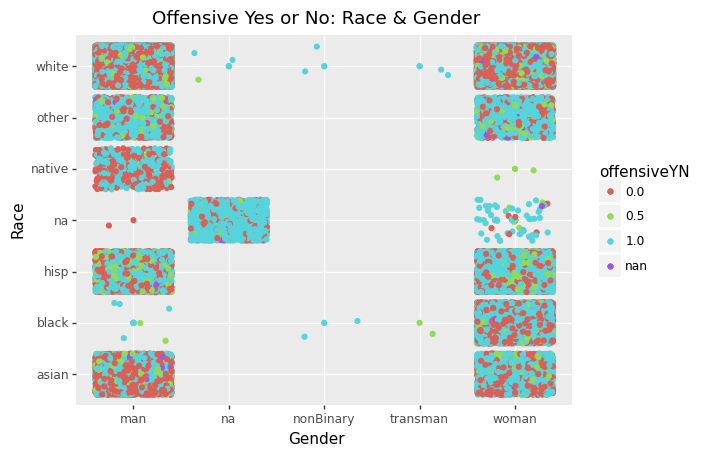

<ggplot: (8780542550301)>

In [ ]:
(ggplot(SBIC_total)
 + aes(x='annotatorGender', y='annotatorRace', color='offensiveYN')
 + geom_point() + geom_jitter()
 + labs(title='Offensive Yes or No: Race & Gender', x='Gender', y='Race')
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


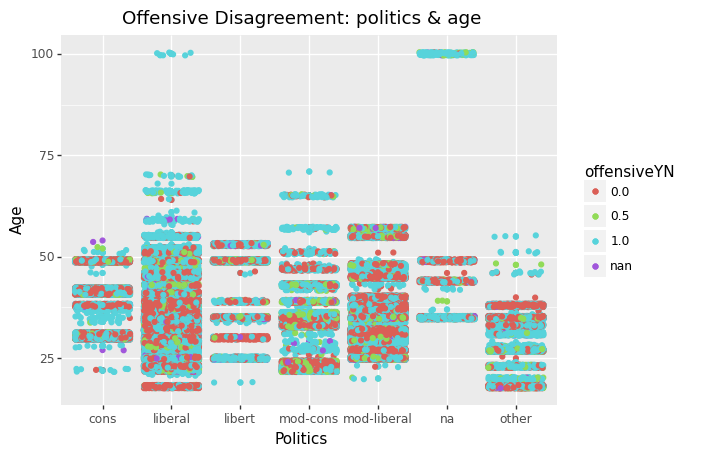

<ggplot: (8780544498393)>

In [ ]:
(ggplot(SBIC_total)
 + aes(x='annotatorPolitics', y='annotatorAge', color='offensiveYN')
 + geom_point() + geom_jitter()
 + labs(title='Offensive Disagreement: politics & age', x='Politics', y='Age')
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


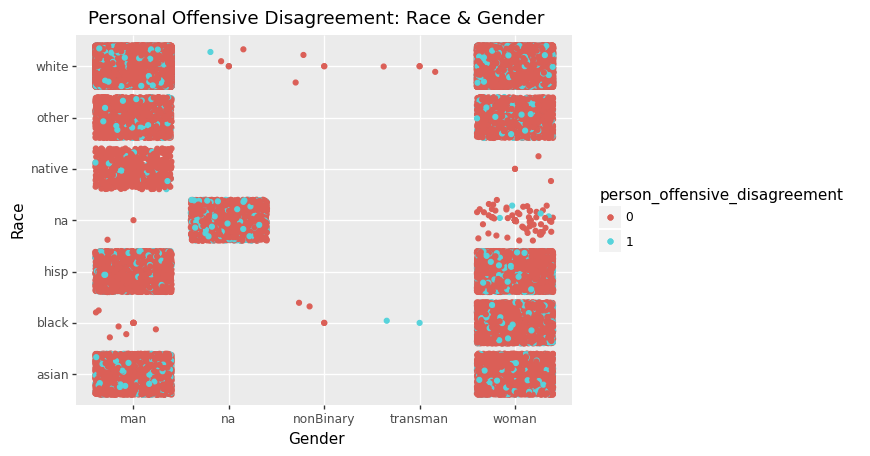

<ggplot: (8780546707905)>

In [ ]:
(ggplot(SBIC_total)
 + aes(x='annotatorGender', y='annotatorRace', color='person_offensive_disagreement')
 + geom_point() + geom_jitter()
 + labs(title='Personal Offensive Disagreement: Race & Gender', x='Gender', y='Race')
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


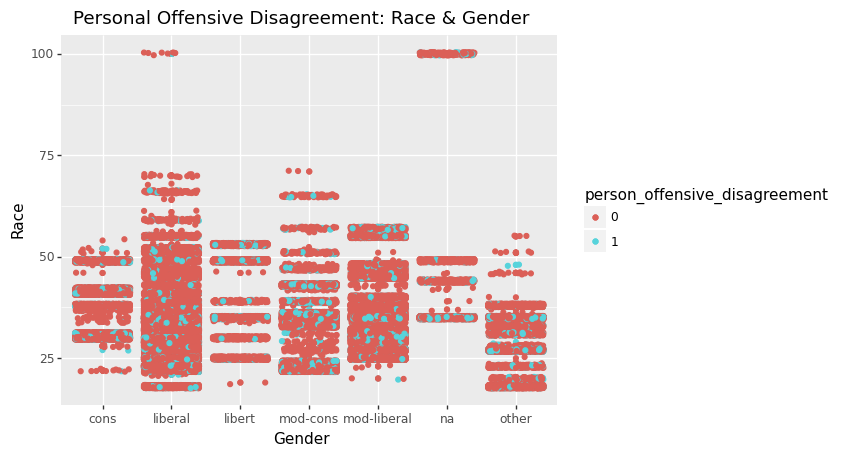

<ggplot: (8780546707861)>

In [ ]:
(ggplot(SBIC_total)
 + aes(x='annotatorPolitics', y='annotatorAge', color='person_offensive_disagreement')
 + geom_point() + geom_jitter()
 + labs(title='Personal Offensive Disagreement: Race & Gender', x='Gender', y='Race')
)

In [ ]:
SBIC_Total_updated

,whoTarget,intentYN,sexYN,sexReason,offensiveYN,annotatorMinority,sexPhrase,speakerMinorityYN,WorkerId,HITId,...,Major_offensive,Major_sex,Major_intent,person_offensive_disagreement,person_sex_disagreement,person_intent_disagreement,offensive_disagreement,intent_disagreement,sex_disagreement,Major_age
0,0.0,0.66,0.0,NaN,1.0,NaN,NaN,NaN,-8935932304856669427,363A7XIFV4G2799C5V96YERJA9AVAM,...,0.5,0.0,0.66,1,0,0,1,1,0,35.0
1,0.0,0.66,0.0,NaN,0.5,NaN,NaN,NaN,6347880360297734464,363A7XIFV4G2799C5V96YERJA9AVAM,...,0.5,0.0,0.66,0,0,0,1,1,0,35.0
2,0.0,0.33,0.0,NaN,0.5,NaN,NaN,NaN,-7452610791699819066,363A7XIFV4G2799C5V96YERJA9AVAM,...,0.5,0.0,0.66,0,0,1,1,1,0,35.0
3,1.0,1.00,0.0,NaN,1.0,NaN,NaN,0.0,-500114755446676507,3JTPR5MTZS6RLS3JBV4IOU0G2X35K5,...,1.0,0.0,1.00,0,0,0,0,0,0,25.0
4,1.0,1.00,0.0,NaN,1.0,NaN,NaN,0.0,-500114755446676507,3JTPR5MTZS6RLS3JBV4IOU0G2X35K5,...,1.0,0.0,1.00,0,0,0,0,0,0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147134,1.0,0.00,0.0,NaN,1.0,NaN,NaN,0.0,7891575995618716029,39O6Z4JLX2RE3MH5G51KIM2HDSKXVR,...,1.0,0.0,0.00,0,0,0,0,0,0,40.0
147135,1.0,0.00,0.0,NaN,1.0,NaN,NaN,0.0,7891575995618716029,39O6Z4JLX2RE3MH5G51KIM2HDSKXVR,...,1.0,0.0,0.00,0,0,0,0,0,0,40.0
147136,0.0,1.00,0.0,NaN,1.0,NaN,NaN,NaN,7891575995618716029,3RDTX9JRTYVMR0YBVRSQW50WK7N79R,...,0.5,0.0,0.66,1,0,1,1,1,0,40.0
147137,0.0,0.66,0.0,NaN,0.5,NaN,NaN,NaN,-7790343187498138255,3RDTX9JRTYVMR0YBVRSQW50WK7N79R,...,0.5,0.0,0.66,0,0,0,1,1,0,40.0


In [ ]:
offensive_disagreement = SBIC_Total_updated[SBIC_Total_updated['offensive_disagreement'] ==1] 

In [ ]:
person_offensive_disagreement = offensive_disagreement[offensive_disagreement['person_offensive_disagreement']==1]

In [ ]:
person_offensive_disagreement['person_age_disagreement'] = [1 if (person_offensive_disagreement['annotatorAge'].iloc[x] <= person_offensive_disagreement['Major_age'].iloc[x]+5  and  person_offensive_disagreement['annotatorAge'].iloc[x] >= person_offensive_disagreement['Major_age'].iloc[x]-5) else 0 for x in range(len(person_offensive_disagreement['annotatorAge']))]
person_offensive_disagreement['person_race_disagreement'] = [1 if person_offensive_disagreement['annotatorRace'].iloc[x] != person_offensive_disagreement['Major_race'].iloc[x] else 0 for x in range(len(person_offensive_disagreement['annotatorRace']))]
person_offensive_disagreement['person_gender_disagreement'] = [1 if person_offensive_disagreement['annotatorGender'].iloc[x] != person_offensive_disagreement['Major_Gender'].iloc[x] else 0 for x in range(len(person_offensive_disagreement['annotatorGender']))]
person_offensive_disagreement['person_politics_disagreement'] = [1 if person_offensive_disagreement['annotatorPolitics'].iloc[x] != person_offensive_disagreement['Major_politics'].iloc[x] else 0 for x in range(len(person_offensive_disagreement['annotatorPolitics']))]


In [ ]:
person_offensive_disagreement['HITId'].count()

17847

In [ ]:
print(sum(person_offensive_disagreement['person_age_disagreement']), sum(person_offensive_disagreement['person_race_disagreement']),
      sum(person_offensive_disagreement['person_gender_disagreement']), sum(person_offensive_disagreement['person_politics_disagreement']) )

10441 4167 4896 8218


**Social Chemistry 101**

In [ ]:
social_chemistry = pd.read_csv('/content/drive/MyDrive/Morality   Legality/Original_Datasets/Social_Chemistry101/demographics_publish.csv')

In [ ]:
social_chemistry.columns

Index(['worker-id', 'gender', 'gender-manual', 'age', 'race', 'race-manual',
       'marital', 'economic', 'school', 'income', 'children', 'household',
       'us', 'state', 'area', 'time-in-us'],
      dtype='object')

In [ ]:
for i in ['gender','race','age','marital','economic','school','income','household','time-in-us']:
  print(social_chemistry[i].value_counts())

female    71
male      61
Name: gender, dtype: int64
white             108
asian               5
black               4
white|black         4
white|native        4
hispanic            3
white|asian         2
white|other         1
white|hispanic      1
Name: race, dtype: int64
30-39    52
21-29    33
40-49    29
50-59    12
60-69     4
18-20     2
Name: age, dtype: int64
never        75
married      45
divorced     10
separated     2
Name: marital, dtype: int64
working         58
middle          54
lower           13
upper-middle     7
Name: economic, dtype: int64
bachelor        59
some-college    27
grad            21
associate       15
hs              10
Name: school, dtype: int64
50     28
75     22
30     22
20     21
40     14
100    12
0      11
150     2
Name: income, dtype: int64
2    47
1    35
3    17
4    12
6    10
5     7
0     3
8     1
Name: household, dtype: int64
10-     127
none      3
2-5       1
5-10      1
Name: time-in-us, dtype: int64
